
#  Analyse bivariée de variables qualitatives

  Nous cherchons ici à examiner les relations entre deux variables qualitatives à travers des tableaux croisés, des visualisations et des tests du **Chi² d'indépendance**.

**Exemples analysés :**
- Répartition du **genre** des philosophes selon leur **génération**
- Lien entre **école de pensée** et **nationalité**


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")
pd.set_option('display.max_columns', None)


In [2]:

df = pd.read_csv("philosophes_post1700.csv")

# Renommage pour plus de clarté
df.rename(columns={
    'birthDate': 'date_naissance',
    'sexLabel': 'genre',
    'movementLabel': 'ecole_pensee',
    'nationalityLabel': 'nationalite',
    'universityLabel': 'universite'
}, inplace=True)

df['date_naissance'] = pd.to_datetime(df['date_naissance'], errors='coerce')
df['annee'] = df['date_naissance'].dt.year
df = df[df['annee'].notna()]

# Tranches de 25 ans
df['tranche_25'] = ((df['annee'] - 1700) // 25 * 25 + 1700).astype("Int64")

# Nettoyage des variables qualitatives
for col in ['genre', 'ecole_pensee', 'nationalite']:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace(['nan', 'None', ''], pd.NA)

df.head()


,philosopherLabel,date_naissance,genre,nationalite,ecole_pensee,teacherLabel,studentLabel,annee,tranche_25
0,Vesna Pusić,1953-03-25 00:00:00+00:00,féminin,Croatie,<NA>,NaN,NaN,1953,1950
1,Edmund Husserl,1859-04-08 00:00:00+00:00,masculin,empire d'Autriche,philosophie occidentale,Friedrich Paulsen,Martin Heidegger,1859,1850
2,Edmund Husserl,1859-04-08 00:00:00+00:00,masculin,Reich allemand,philosophie occidentale,Friedrich Paulsen,Martin Heidegger,1859,1850
3,Edmund Husserl,1859-04-08 00:00:00+00:00,masculin,empire d'Autriche,philosophie occidentale,Karl Weierstrass,Martin Heidegger,1859,1850
4,Edmund Husserl,1859-04-08 00:00:00+00:00,masculin,Reich allemand,philosophie occidentale,Karl Weierstrass,Martin Heidegger,1859,1850



##  Répartition du genre selon la génération (tranches de 25 ans)


<Figure size 1400x600 with 0 Axes>

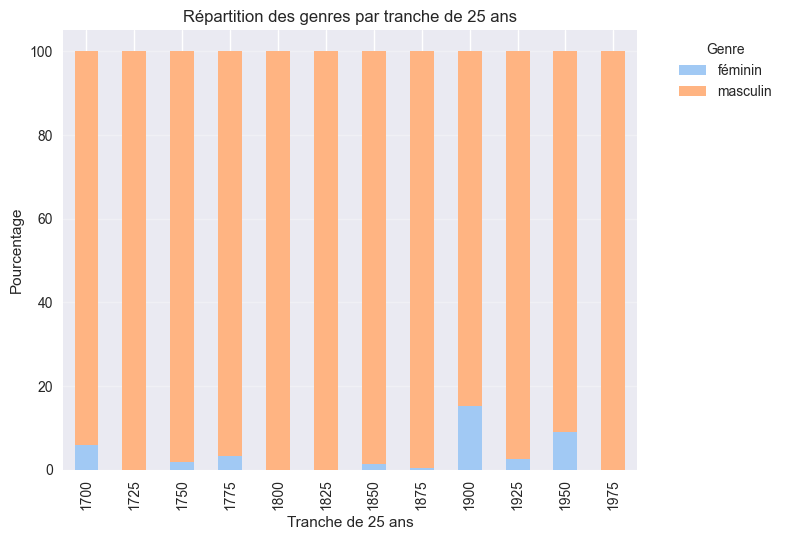

In [3]:

# Tableau croisé
genre_tranche = pd.crosstab(df['tranche_25'], df['genre'])

# Normalisation pour les proportions
genre_tranche_pct = genre_tranche.div(genre_tranche.sum(axis=1), axis=0) * 100

# Affichage
plt.figure(figsize=(14, 6))
genre_tranche_pct.plot(kind='bar', stacked=True)
plt.title("Répartition des genres par tranche de 25 ans")
plt.xlabel("Tranche de 25 ans")
plt.ylabel("Pourcentage")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


In [4]:

# Test du Chi²
chi2, p, dof, expected = chi2_contingency(genre_tranche)
print(f"Statistique de test du Chi² : {chi2:.2f}")
print(f"p-value : {p:.4f}")


Statistique de test du Chi² : 65.26
p-value : 0.0000


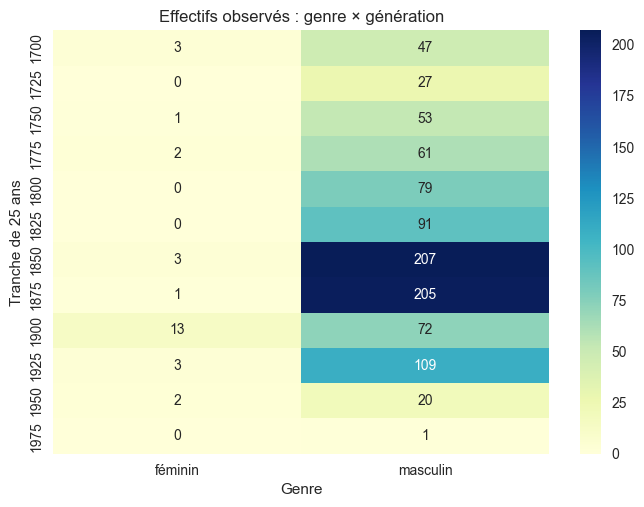

In [5]:

sns.heatmap(genre_tranche, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Effectifs observés : genre × génération")
plt.ylabel("Tranche de 25 ans")
plt.xlabel("Genre")
plt.show()



##  Lien entre école de pensée et nationalité


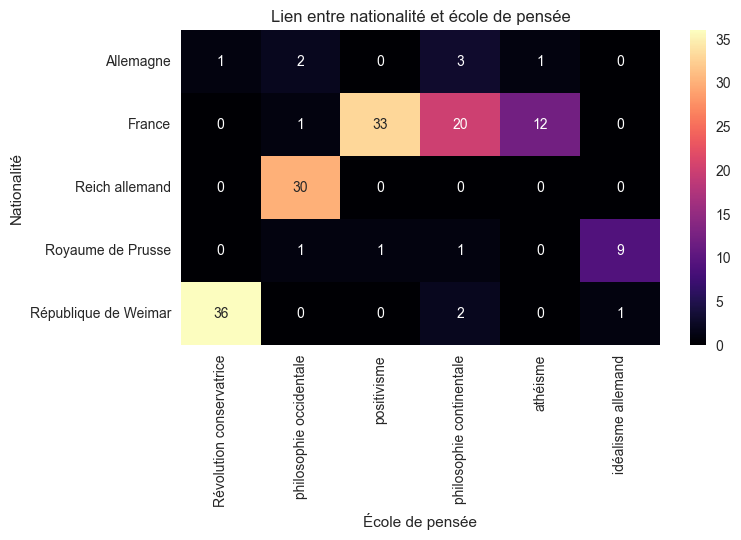

Chi² : 375.43 — p-value : 0.0000


In [6]:

# On garde les 5 nationalités les plus représentées
top_nat = df['nationalite'].value_counts().head(5).index
subset = df[df['nationalite'].isin(top_nat)]

# Croisement
cross_tab = pd.crosstab(subset['nationalite'], subset['ecole_pensee'])

# Tri des colonnes pour les + représentées
top_ecoles = cross_tab.sum(axis=0).sort_values(ascending=False).head(6).index
cross_tab = cross_tab[top_ecoles]

# Heatmap
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="magma")
plt.title("Lien entre nationalité et école de pensée")
plt.xlabel("École de pensée")
plt.ylabel("Nationalité")
plt.tight_layout()
plt.show()

# Test du Chi²
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi² : {chi2:.2f} — p-value : {p:.4f}")


In [7]:

fig = px.imshow(cross_tab, text_auto=True, aspect="auto",
                title="Distribution école de pensée × nationalité (top 5 pays)")
fig.write_html("ecole_nationalite_interactive.html")
fig.show()
